# CIFAR-10 CNN

In [117]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


## Data Preperation

1. Loads the CIFAR-10 dataset: Splits the data into training and testing sets.
2. Normalizes pixel values: Scales the pixel values to a range between 0 and 1.
3. Applies one-hot encoding: Converts the class labels into a one-hot encoded format. 

In [118]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## CNN Model

1.  Convolutional Layers: Three convolutional layers (`Conv2D`) with ReLU activation.
2. Max Pooling Layers: Max pooling layers to reduce the spatial dimensions.
3. Dropout Layers: Dropout layers to prevent overfitting.
4. Flatten Layers: Flattens the 3D feature maps into 1D vector.
5. Dense Layer: A dense layer with softmax activation.


In [119]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model Training

This cell trains the CNN model using the training data and validates it on a portion of the data (25%)

1. Early Stopping: Implements early stopping to prevent overfitting.
2. Training Params: Sets batch size and epoch count for training.
3. Model Compilation: Compiles model with the categorical crossentropy loss function, Adam optimizer, and accuracy metric.
4. Model fitting: Trains the model using fit method and passing the training data, validation split, and early stopping callback.

In [120]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


batch_size = 32
epochs = 38

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.25, callbacks=[early_stopping])


Epoch 1/100
1172/1172 [==============================] - 24s 20ms/step - loss: 1.6936 - accuracy: 0.3660 - val_loss: 1.3406 - val_accuracy: 0.4980
Epoch 2/100
1172/1172 [==============================] - 23s 19ms/step - loss: 1.3218 - accuracy: 0.5183 - val_loss: 1.1205 - val_accuracy: 0.5978
Epoch 3/100
1172/1172 [==============================] - 24s 20ms/step - loss: 1.1642 - accuracy: 0.5812 - val_loss: 1.0207 - val_accuracy: 0.6382
Epoch 4/100
1172/1172 [==============================] - 24s 20ms/step - loss: 1.0634 - accuracy: 0.6212 - val_loss: 0.9260 - val_accuracy: 0.6756
Epoch 5/100
1172/1172 [==============================] - 25s 21ms/step - loss: 0.9970 - accuracy: 0.6482 - val_loss: 0.8940 - val_accuracy: 0.6820
Epoch 6/100
1172/1172 [==============================] - 24s 21ms/step - loss: 0.9388 - accuracy: 0.6685 - val_loss: 0.9506 - val_accuracy: 0.6646
Epoch 7/100
1172/1172 [==============================] - 24s 21ms/step - loss: 0.9017 - accuracy: 0.6781 - val_loss: 0

This cell visualizes the training and validation loss curve.

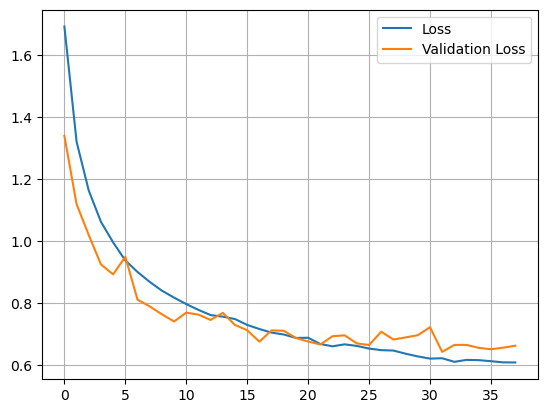

In [121]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()


## Model Evaluation

This cell evaluates the trained model on the test dataset to assess its performance on unseen data.

In [122]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.6775943040847778
Test accuracy: 0.7702000141143799


## Visualizing Predictions

Here we visualize models predictions on a random sample of test images.

313/313 [==============================] - 2s 7ms/step


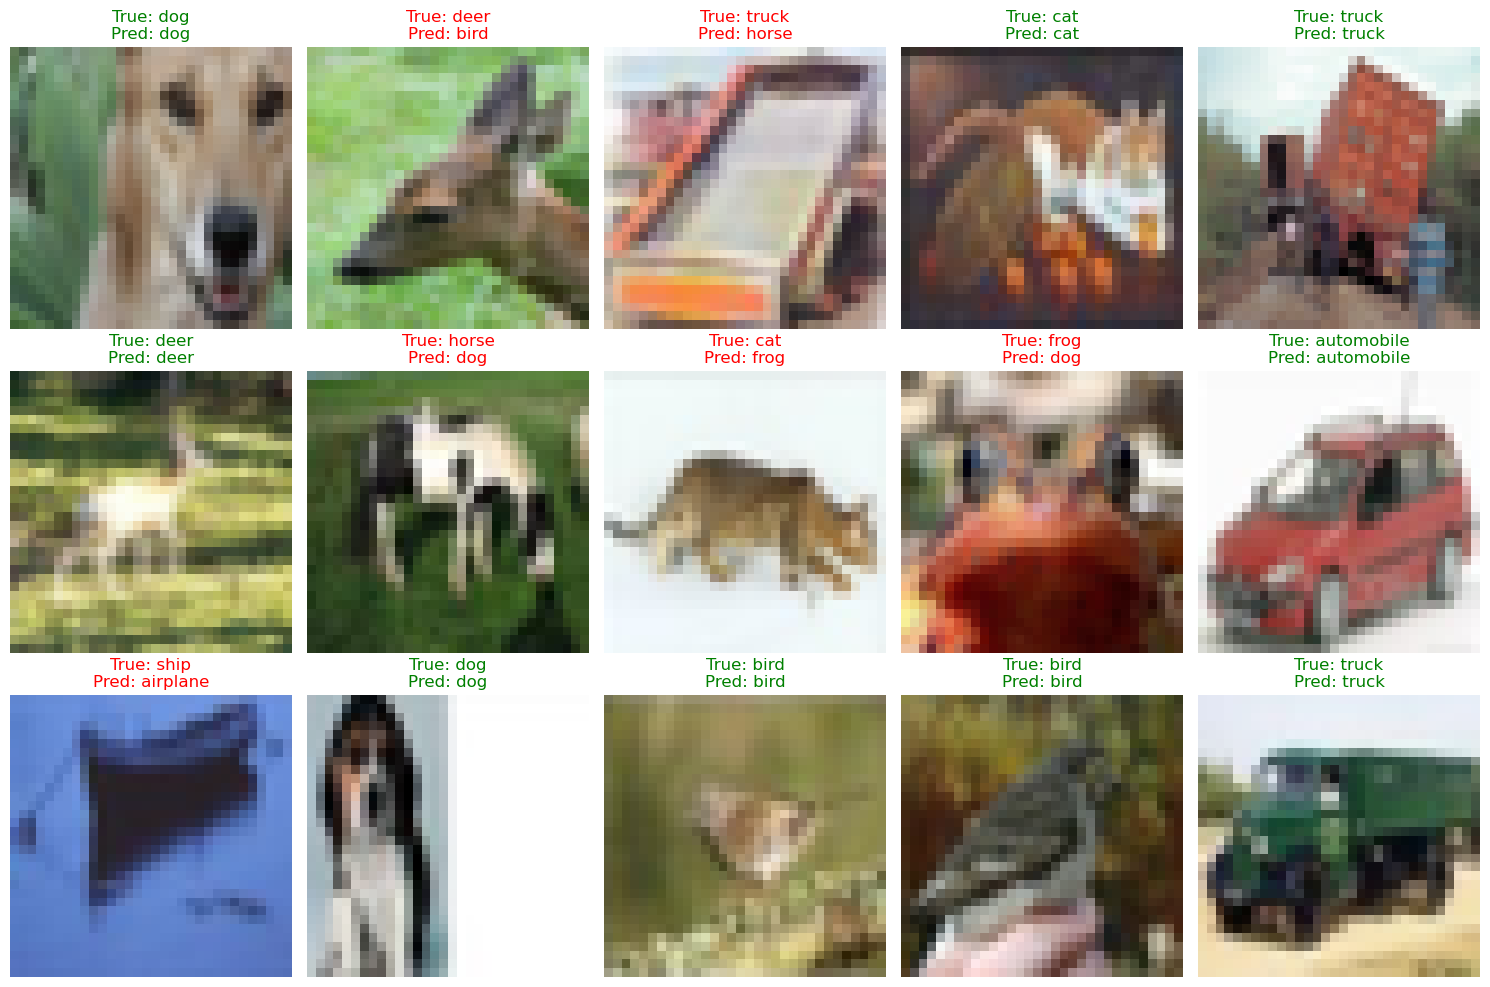

In [123]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

num_samples = 15
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    img = x_test[idx]

    true_label = np.argmax(y_test[idx])
    pred_label = predicted_classes[idx]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
              color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Comparison of FCN and CNN for CIFAR-10

## Model Architectures

**FCN (Fully Connected Network):**
- Structure: Flattened input (3072) → Dense(1002) → Dense(334) → Dense(10)
- ~3.4M parameters

**CNN (Convolutional Neural Network):**
- Structure: Conv2D(32) → Conv2D(64) → Conv2D(64) → Dense(10)
- Uses MaxPooling and Dropout layers

## Performance

1. **Accuracy Comparison:**
   - CNN achieved higher test accuracy than FCN

2. **Training Efficiency:**
   - CNN converges faster despite having more complex architecture
   - FCN requires more epochs to reach lower performance

3. **Model Size vs Performance:**
   - FCN has more parameters (~3.4M) but performs worse
   - CNN achieves better results with more efficient parameter usage

## Implemented Improvements

- **Regularization:** Dropout layers (0.25) prevent overfitting
- **Early Stopping:** Automatically stops training when validation loss stops improving

## Conclusion
CNN accuracy is 0.77 while is FCN accuracy is 0.52. That shows CNNs are clearly superior to FCNs for image classification tasks. The architectural advantages of convolution operations make CNNs more effective at learning spatial features critical for image recognition, resulting in higher accuracy with fewer parameters and training time